In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import sys 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [26]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [31]:
def return_categorical(df):
    categorical_columns=[column_name for column_name in df if df[column_name].dtype=="0"]
    
    return categorical_columns
def return_numerical(df):
    return  list(set(df.columns)-set(return_categorical(df)))

def check_normal(df):
    fig,axes = plt.subplots(1,len(return_numerical(df)),figsize=(70,10))
    
    for i,numeric_column_name in enumerate(list(set(df.columns)-set(return_categorical(df)))):
    
        sns.displot(df[numeric_column_name],ax=axes[i])
        plt.title(f"Distribution of {numeric_column_name}")

def classifier(clf,x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)
    
    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train = accuracy_score(y_train,y_train_pred)
    
    roc_test=roc_auc_score(y_test,y_test_pred,multi_class="ovr")
    roc_train=roc_auc_score(y_train,y_train_pred,multi_class="ovr")
    
    print("Train accuracy is:",accuracy_train)
    print("Test accuracy is:",accuracy_test)
    print()
    print("Train ROC is :",roc_train)
    print("Test ROC is:",roc_test)
    
    f1=f1_score(y_test,y_test_pred)
    precision=precision_score(y_test,y_test_pred)
    recall=recall_score(y_test,y_test_pred)
    
    print()
    print("F1 score is:",f1)
    print("Precision is:",precision)
    print("Recall is:",recall)

def random_search(clf,params,x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator=clf,param_distributions=params,scoring="roc_auc",cv=5)
    random_search.fit(x_train,y_train)
    optimal_model=random_search.best_estimator_
    
    print("Best parameters are:",random_search.best_params_)
    print()
    print("Best estimator is:",random_search.best_estimator_)
    print()
    print("Scores and accuracies are:")
    print()
    classifier(optimal_model,x_train,x_test,y_train,y_test)

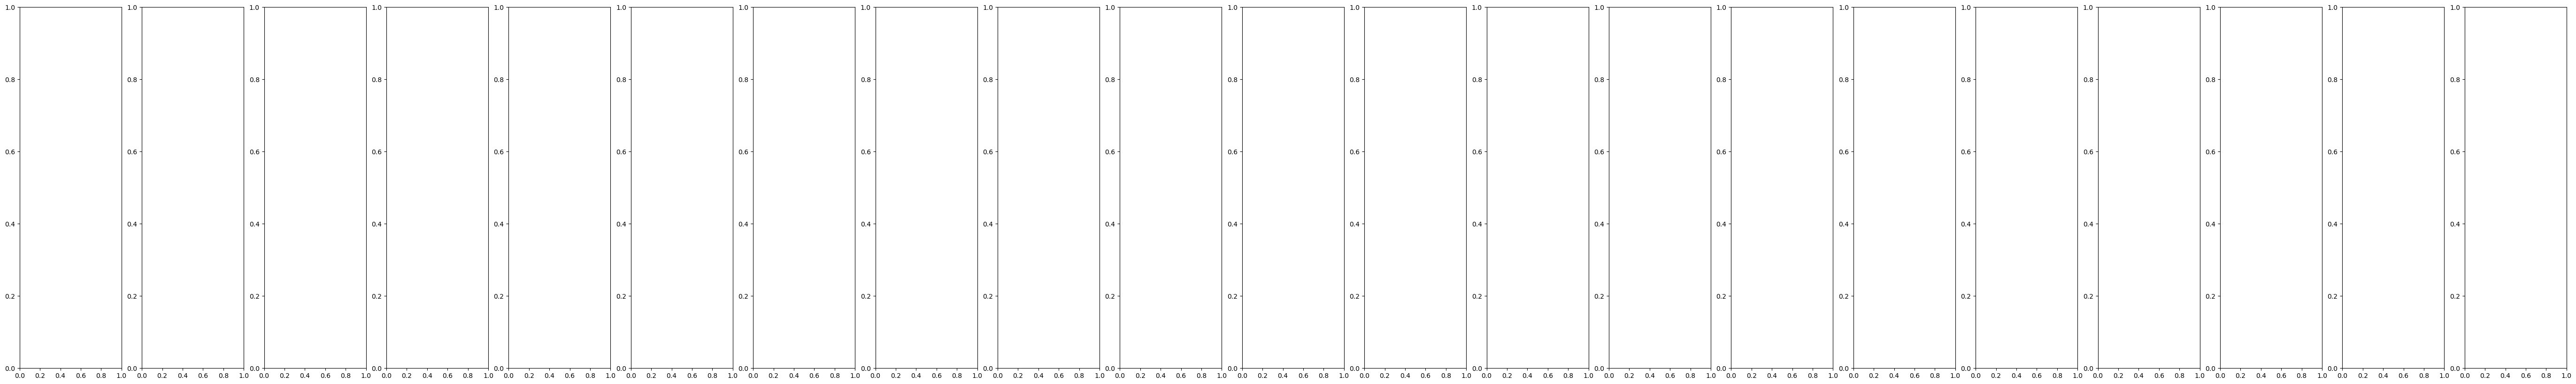

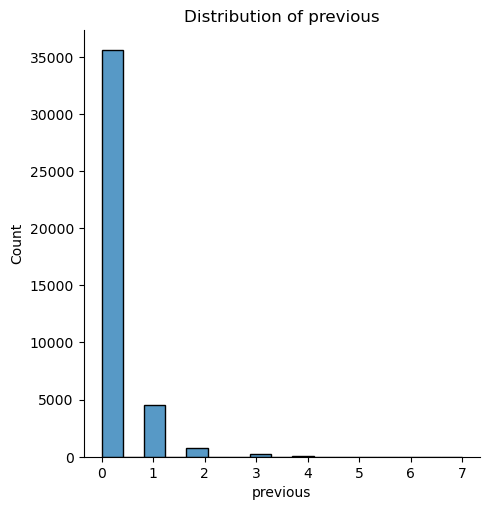

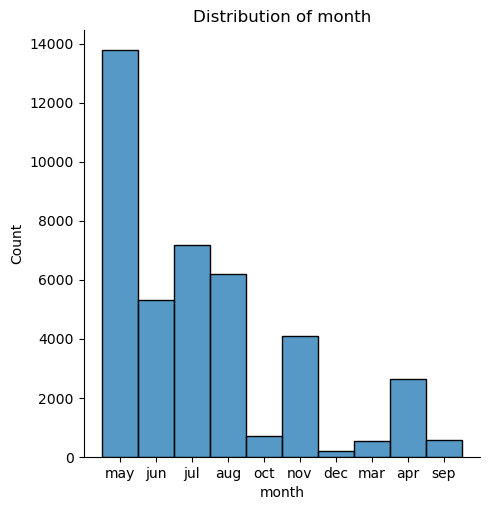

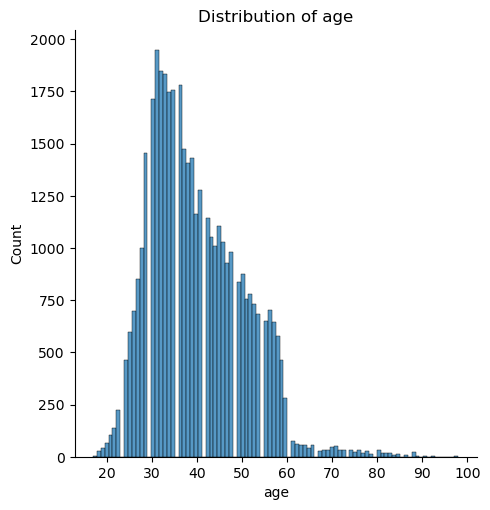

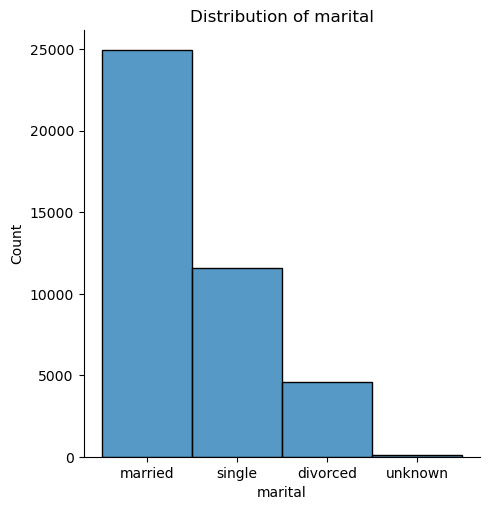

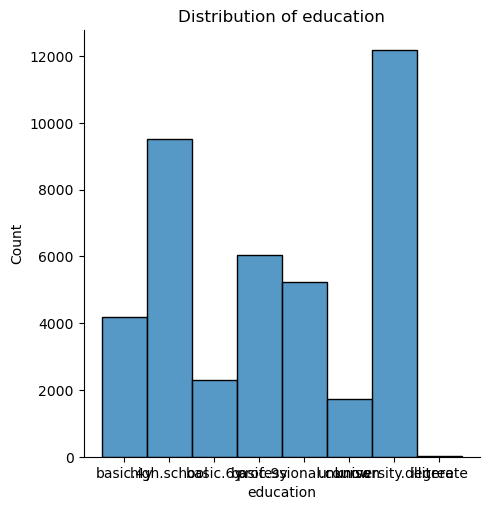

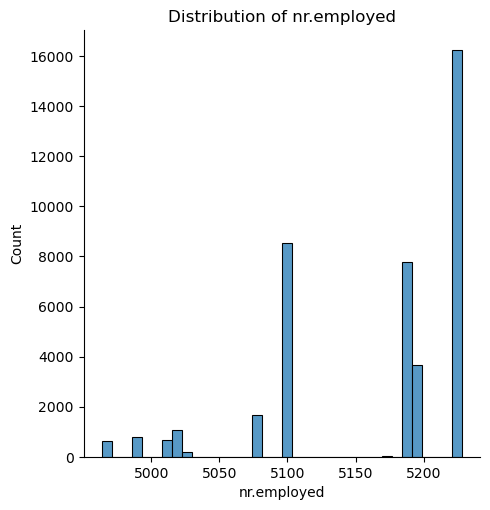

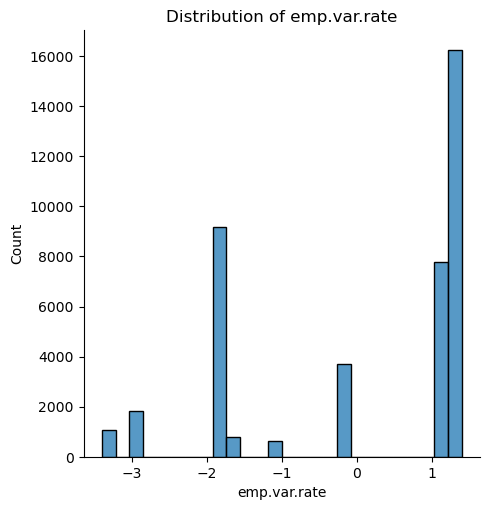

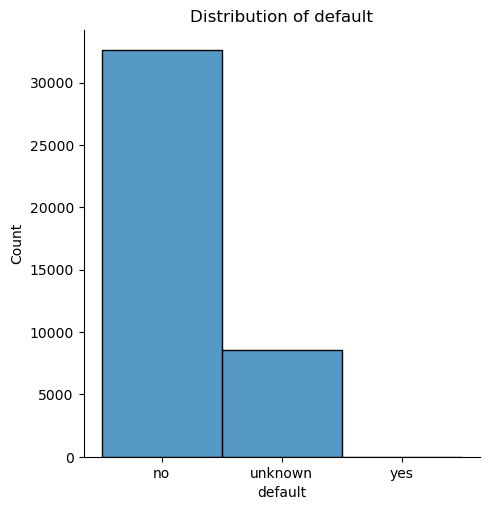

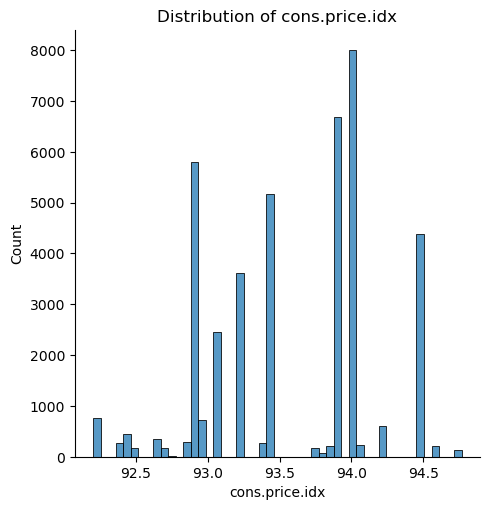

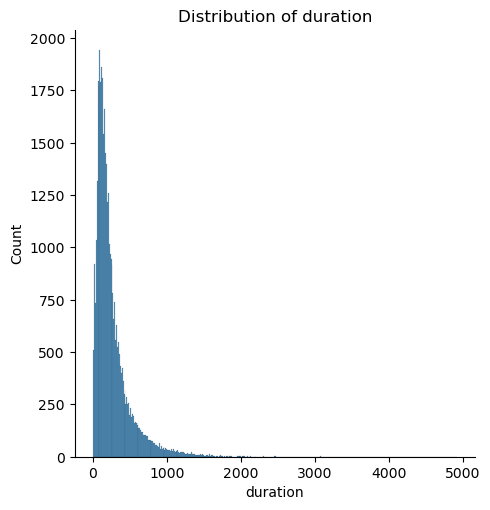

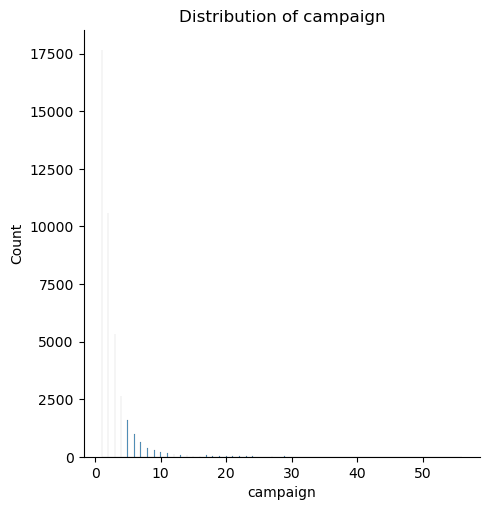

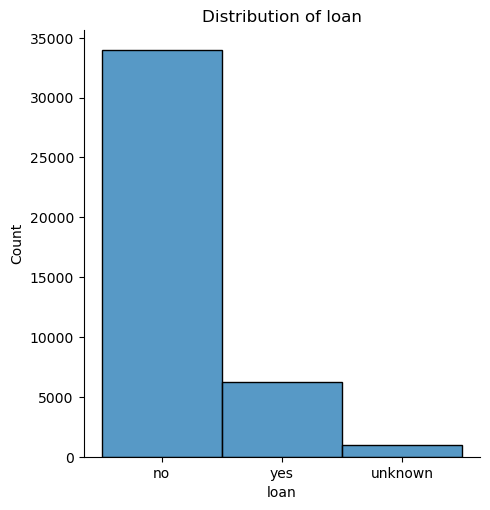

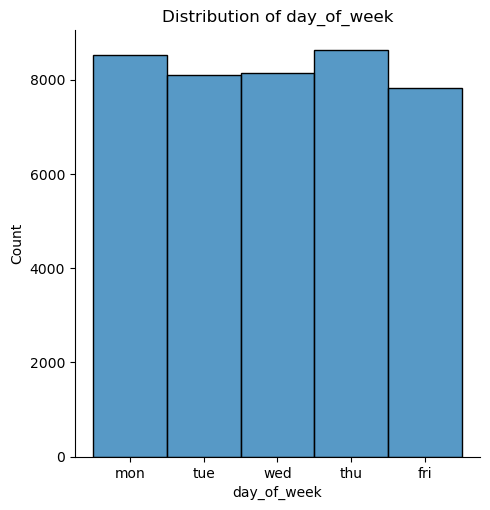

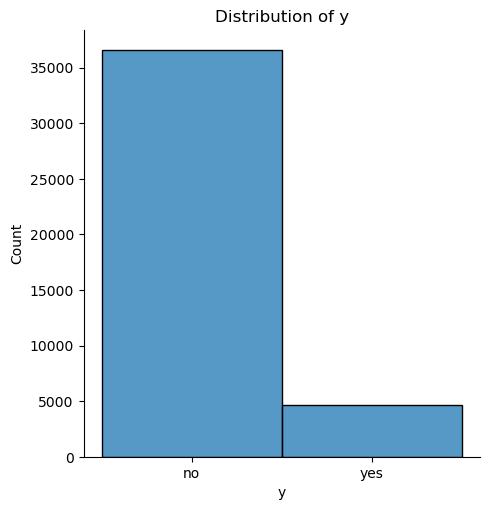

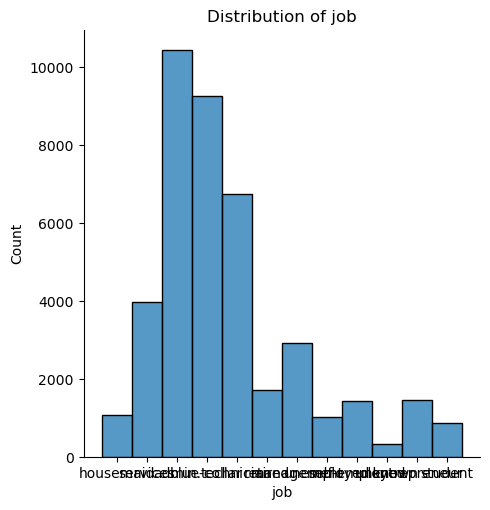

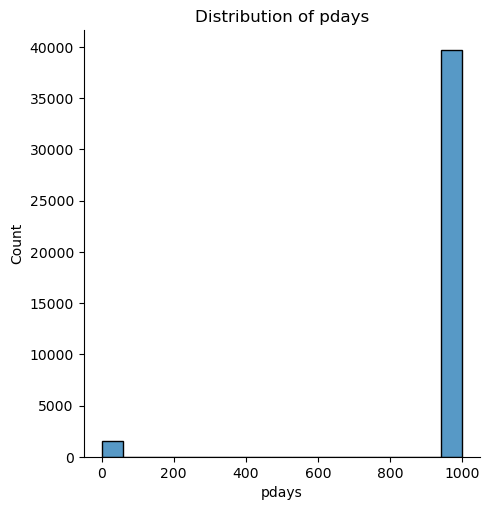

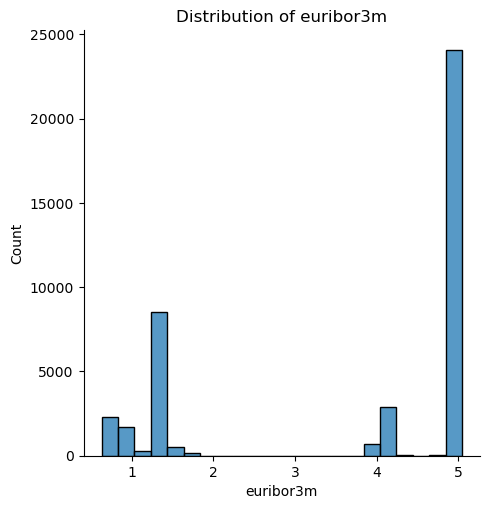

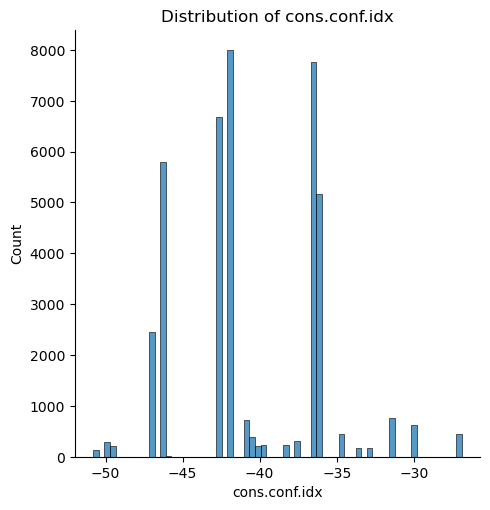

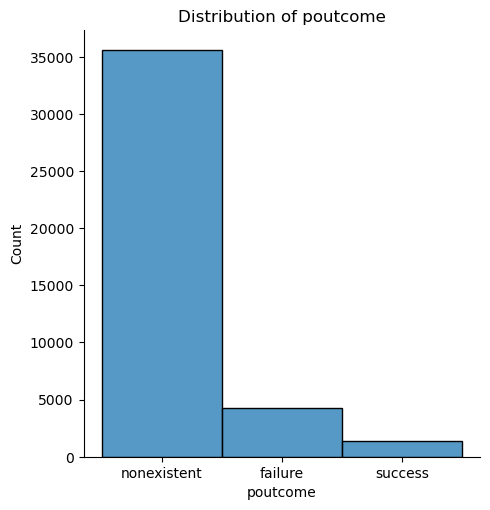

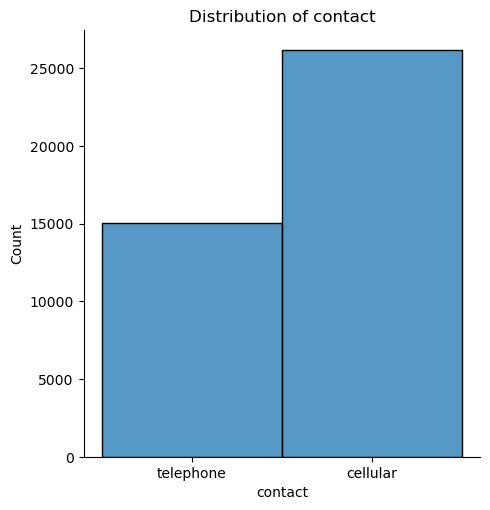

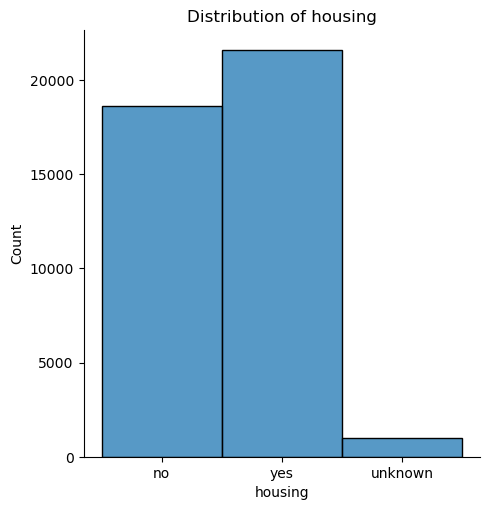

In [32]:
check_normal(df)

In [33]:
for col in return_categorical(df):
    counts=df[col].value_counts().sort_index()
    if len(counts)>10:
        fig=plt.figure(figsize=(30,10))
    else:
        fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    counts.plot.bar(ax=ax,color="steelblue")
    ax.set_title(col+"counts")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

In [34]:
corr=df.corr()
corr_greater_than_75=corr[corr>.75]
corr_greater_than_75

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


<AxesSubplot:>

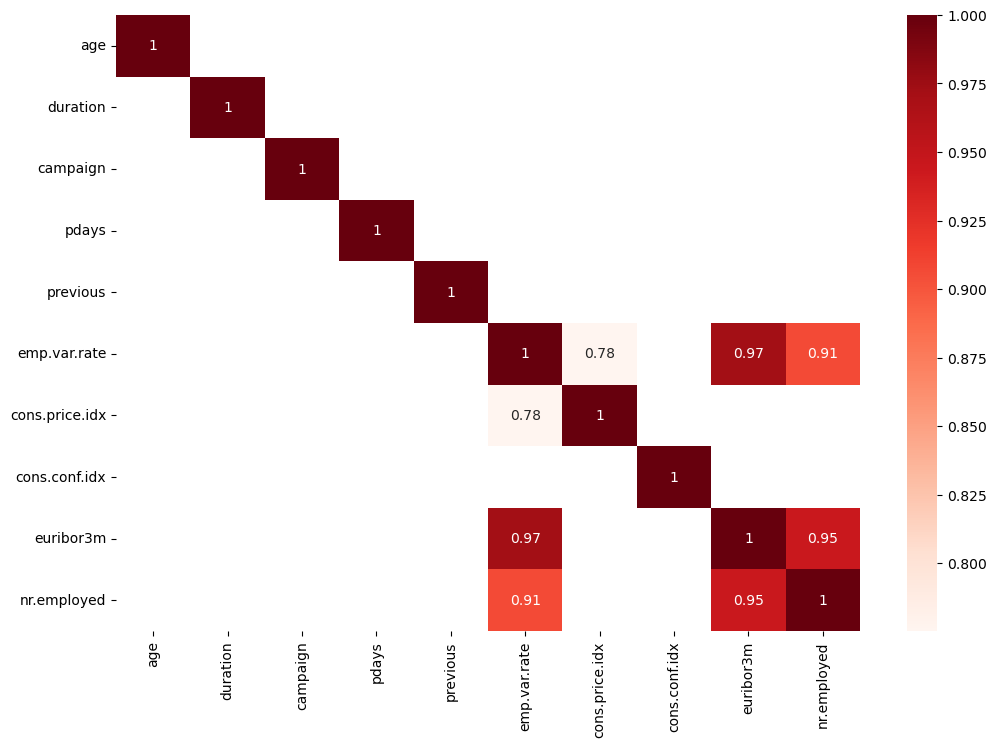

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75,cmap="Reds",annot=True)

In [37]:
df=pd.get_dummies(df,drop_first=True)